D:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


      팀명  승리  패배  세이브  홀드
0   1위 팀  88  55   51  92
1  10위 팀  48  93   16  47


['승리', '패배', '세이브', '홀드']


[88, 55, 51, 92, 88]


[48, 93, 16, 47, 48]


[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]




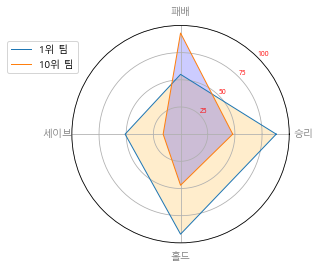

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# 데이터로딩
kbo = pd.read_csv('./data/kbo.csv')
print(kbo.head())
print('\n')

# 변수 지정
var = kbo.columns.to_list()[1:]
print(var)
print('\n')

# 1위 팀 값 지정
val1 = kbo.loc[0,:].drop('팀명').values.tolist()
val1 += val1[:1]
print(val1)
print('\n')

# 10위 팀 값 지정
val2 = kbo.loc[1,:].drop('팀명').values.tolist()
val2 += val2[:1]
print(val2)
print('\n')

# 변수별 각도 계산
# 차트에 그릴 변수의 개수 구하기
num_var = len(var)

# 원의 각도 (2파이 = 260)를 라디안으로 나타내고 변수의 개수로 나눈다. 4개의 변수로 나누면 각 변수마다 90도의 각을 이룬다. 
deg = [n / float(num_var) * 2 * pi for n in range(num_var)]
deg += deg[:1]
print(deg)
print('\n')

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 레이더 차트 그리기
ax = plt.subplot(111, polar =True)
plt.xticks(deg[:-1], var, color = 'grey', size = 10)

ax.set_rlabel_position(45)
plt.yticks([25,50,75,100], ['25','50','75','100'], color = 'red', size = 7)
plt.ylim(0,100)

ax.plot(deg, val1, linewidth  =1, linestyle = 'solid', label = '1위 팀')
ax.fill(deg, val1, 'orange', alpha =0.2)

ax.plot(deg, val2, linewidth  =1, linestyle = 'solid', label = '10위 팀')
ax.fill(deg, val2, 'blue', alpha =0.2)

plt.legend(loc='best', bbox_to_anchor = (0.05,0.95))